In [1]:
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy import stats

from gurobi_implementation import GurobiSolution
from data_market import Seller, MarketOperator, Market, Buyer
from p2p_gurobi import Agents, FirstStageMarket

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

## Data market

In [3]:
#reading data from csv

probabilities = pd.read_csv('df_probabilities_100.csv')
probabilities = probabilities['0'].to_list()

g_res = pd.read_csv('df_g_res_100.csv')
generation = g_res.drop('Unnamed: 0', axis = 1).loc[0].to_list()

In [4]:
g_res

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.0,0.05545,0.11090,0.16635,0.22180,0.27725,0.33270,0.38815,0.44360,...,4.9905,5.04595,5.10140,5.15685,5.21230,5.26775,5.32320,5.37865,5.43410,5.48955
1,1,0.0,0.04707,0.09414,0.14121,0.18828,0.23535,0.28242,0.32949,0.37656,...,4.2363,4.28337,4.33044,4.37751,4.42458,4.47165,4.51872,4.56579,4.61286,4.65993
2,2,0.0,0.04556,0.09112,0.13668,0.18224,0.22780,0.27336,0.31892,0.36448,...,4.1004,4.14596,4.19152,4.23708,4.28264,4.32820,4.37376,4.41932,4.46488,4.51044
3,3,0.0,0.05004,0.10008,0.15012,0.20016,0.25020,0.30024,0.35028,0.40032,...,4.5036,4.55364,4.60368,4.65372,4.70376,4.75380,4.80384,4.85388,4.90392,4.95396
4,4,0.0,0.04522,0.09044,0.13566,0.18088,0.22610,0.27132,0.31654,0.36176,...,4.0698,4.11502,4.16024,4.20546,4.25068,4.29590,4.34112,4.38634,4.43156,4.47678
5,5,0.0,0.04698,0.09396,0.14094,0.18792,0.23490,0.28188,0.32886,0.37584,...,4.2282,4.27518,4.32216,4.36914,4.41612,4.46310,4.51008,4.55706,4.60404,4.65102
6,6,0.0,0.05026,0.10052,0.15078,0.20104,0.25130,0.30156,0.35182,0.40208,...,4.5234,4.57366,4.62392,4.67418,4.72444,4.77470,4.82496,4.87522,4.92548,4.97574
7,7,0.0,0.03832,0.07664,0.11496,0.15328,0.19160,0.22992,0.26824,0.30656,...,3.4488,3.48712,3.52544,3.56376,3.60208,3.64040,3.67872,3.71704,3.75536,3.79368
8,8,0.0,0.04590,0.09180,0.13770,0.18360,0.22950,0.27540,0.32130,0.36720,...,4.1310,4.17690,4.22280,4.26870,4.31460,4.36050,4.40640,4.45230,4.49820,4.54410
9,9,0.0,0.04933,0.09866,0.14799,0.19732,0.24665,0.29598,0.34531,0.39464,...,4.4397,4.48903,4.53836,4.58769,4.63702,4.68635,4.73568,4.78501,4.83434,4.88367


In [5]:
agent_keys = [661, 1642, 2335, 2361, 2818, 3039, 3456, 3538, 4031, 4373, 4767, 5746, 6139, 7536, 7719, 7800, 7901, 7951, 8156, 8386, 8565, 9019, 9160, 9922, 9278]

dataframe_dict = dict()
for key in agent_keys:
    dataframe_dict.update({key : pd.read_csv('/Users/ishilov/Documents/risk_paper/risk_paper/data/df_{}.csv'.format(key))})

community_size = len(dataframe_dict)

for key in agent_keys:
    cond_min = (dataframe_dict[key]['demand'].quantile(0.01) <= dataframe_dict[key]['demand'])
    cond_max = (dataframe_dict[key]['demand'] <= dataframe_dict[key]['demand'].quantile(0.99))
    dataframe_dict[key] = dataframe_dict[key][cond_min & cond_max]

In [6]:
def distribution_build(sample_size, agent_keys):
    res = {}
    
    for key in agent_keys:
        probas_demand, values_demand = np.histogram(dataframe_dict[key]['demand'], bins = sample_size, density=True)
        probas_demand = probas_demand / probas_demand.sum()
        distribution_demand = stats.rv_histogram([probas_demand, values_demand])

        if 'solar' in dataframe_dict[key].columns:
            data = dataframe_dict[key][dataframe_dict[key]['solar'] >= 0]['solar']
            probas_solar, values_solar = np.histogram(data, bins = sample_size, density=True)
            probas_solar = probas_solar / probas_solar.sum()
            distribution_solar = stats.rv_histogram([probas_solar, values_solar])

        res.update({key : 
                    {'probas_demand' : probas_demand,
                    'values_demand' : values_demand,
                    'probas_solar' : probas_solar,
                    'values_solar' : values_solar,
                    'distribution_demand' : distribution_demand,
                    'distribution_solar' : distribution_solar}})

    return res 

In [7]:
distributions = distribution_build(100, agent_keys)
distributions_solar = {key : distributions[key]['distribution_solar'] for key in agent_keys}

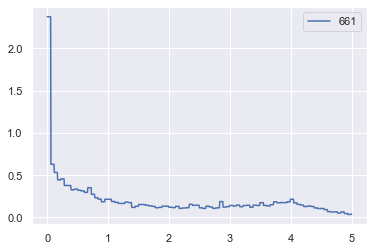

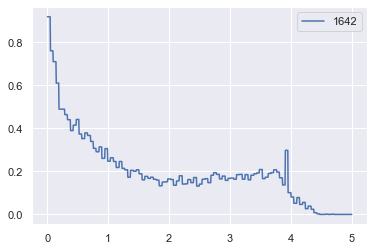

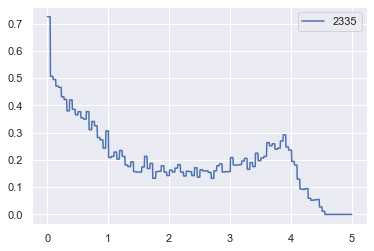

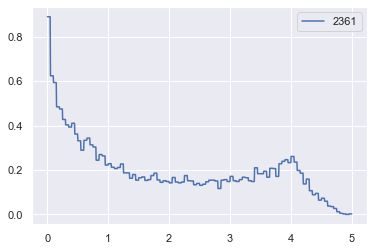

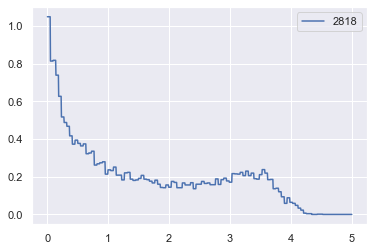

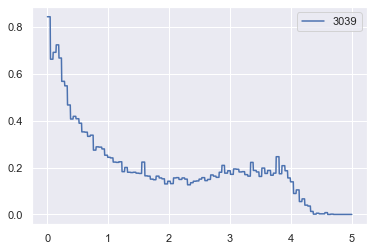

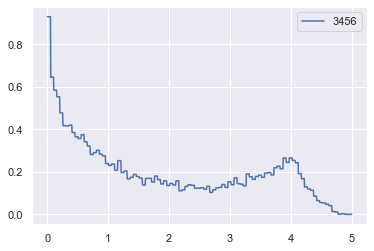

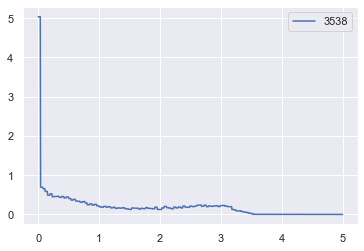

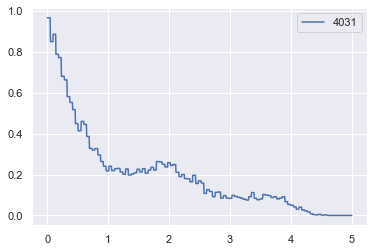

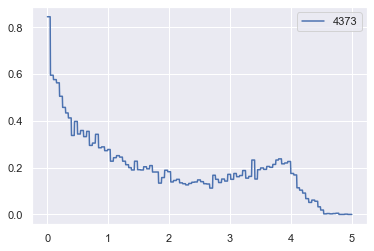

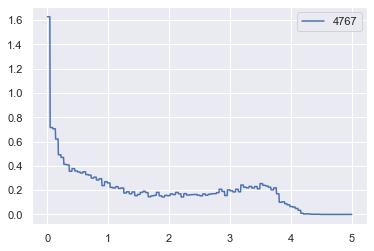

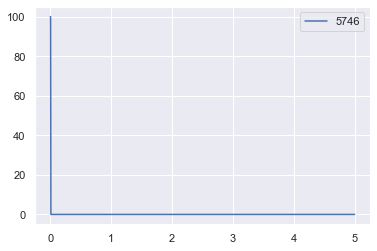

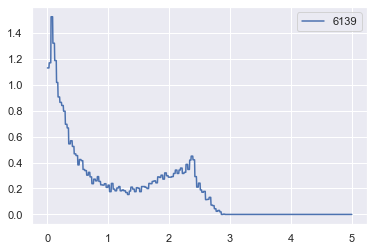

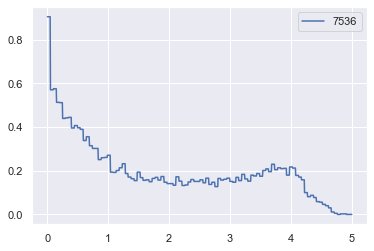

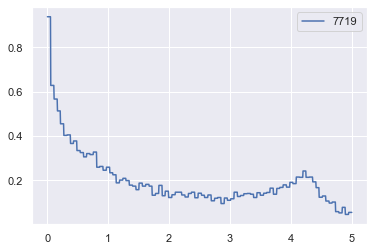

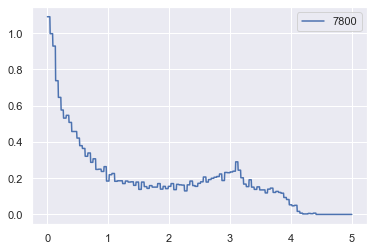

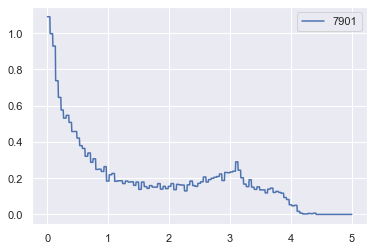

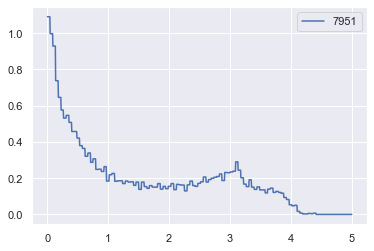

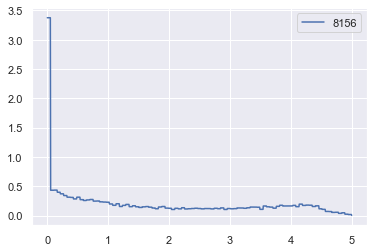

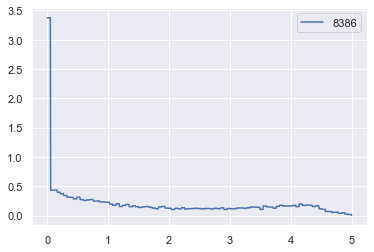

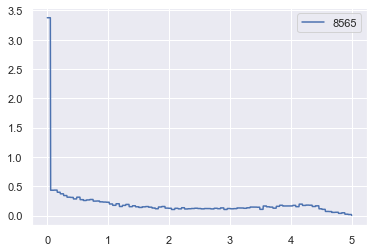

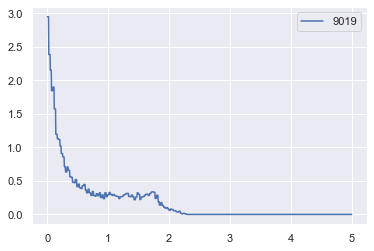

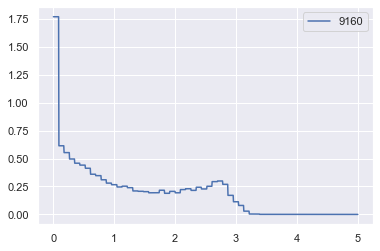

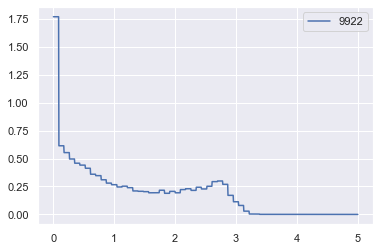

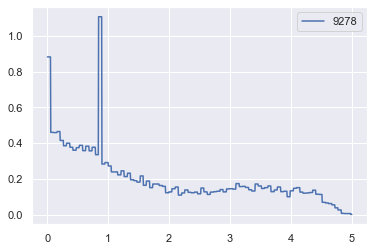

In [8]:
support = np.linspace(0,5, 1000)

for key in agent_keys:
    plt.plot(support, distributions_solar[key].pdf(support), label = key)
    plt.legend()
    plt.show()

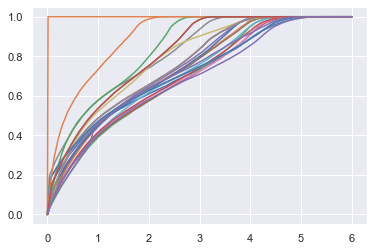

In [9]:
support = np.linspace(0,6, 1000)

for key in agent_keys:
    plt.plot(support, distributions_solar[key].cdf(support), label = key)
    #plt.plot(support, distributions_solar_2[key].cdf(support), label = key)
    #plt.legend()

plt.show()

In [10]:
sellers = [Seller(distributions[key]['probas_solar'], distributions[key]['values_solar'], wager = 1) for key in agent_keys[:-1] if key != 5746]
task = 1.7136738749507794

In [11]:
buyer = Buyer(distributions[agent_keys[-2]]['probas_solar'], distributions[agent_keys[-1]]['values_solar'], utility = 1)

In [12]:
market_1 = Market(sellers, buyer, task = task)

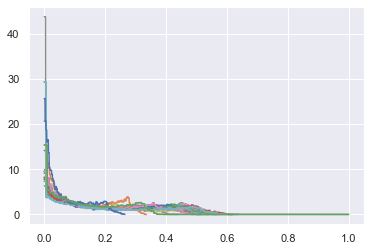

In [13]:
market_1.plot_scaled_forecasts()

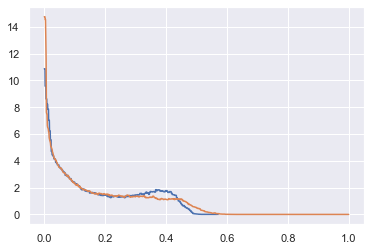

In [14]:
qa_forecast_scaled = market_1.scaled_aggregation(type = 'QA', plot = True)
lop_forecast_scaled = market_1.scaled_aggregation(type = 'LOP', plot = True)

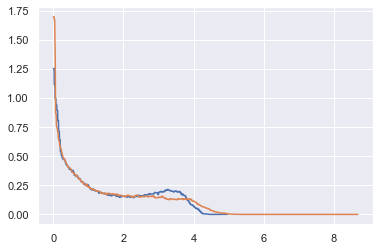

In [15]:
qa_forecast = market_1.aggregation(type = 'QA', plot = True)
lop_forecast = market_1.aggregation(type = 'LOP', plot = True)

In [16]:
market_1.make_scaling()

In [17]:
market_1.calculate_payoffs()

[0.99726577 1.00634224 1.00643911 1.00373637 1.00563966 1.00486774
 1.00314981 0.99297621 1.00435484 1.00715442 1.00549725 0.9961157
 1.00473815 1.00110597 1.00317289 1.00317289 1.00317289 0.99649822
 0.99649822 0.99649822 0.9588947  1.00135437 1.00135437]
[0.04523367 0.04566924 0.04567389 0.04554419 0.04563553 0.04559848
 0.04551604 0.04502781 0.04557387 0.04570822 0.04562869 0.04517847
 0.04559226 0.04541796 0.04551715 0.04551715 0.04551715 0.04519683
 0.04519683 0.04519683 0.         0.04542988 0.04542988]


array([ 0.04249944,  0.05201148,  0.052113  ,  0.04928055,  0.05127518,
        0.05046622,  0.04866584,  0.03800402,  0.0499287 ,  0.05286264,
        0.05112594,  0.04129418,  0.05033042,  0.04652392,  0.04869003,
        0.04869003,  0.04869003,  0.04169505,  0.04169505,  0.04169505,
       -0.0411053 ,  0.04678425,  0.04678425])

In [18]:
market_1.score_dict

{'Seller #0': 0.9425683845763021,
 'Seller #1': 0.951644850423664,
 'Seller #2': 0.9517417220503017,
 'Seller #3': 0.9490389797914743,
 'Seller #4': 0.950942269632934,
 'Seller #5': 0.9501703497027271,
 'Seller #6': 0.9484524181575386,
 'Seller #7': 0.9382788212937743,
 'Seller #8': 0.9496574495980462,
 'Seller #9': 0.9524570320485266,
 'Seller #10': 0.9507998647023873,
 'Seller #11': 0.9414183164058187,
 'Seller #12': 0.9500407670001835,
 'Seller #13': 0.9464085805445028,
 'Seller #14': 0.9484754982930905,
 'Seller #15': 0.9484754982930905,
 'Seller #16': 0.9484754982930905,
 'Seller #17': 0.9418008368937152,
 'Seller #18': 0.9418008368937152,
 'Seller #19': 0.9418008368937152,
 'Seller #20': 0.9041973171794175,
 'Seller #21': 0.9466569835261405,
 'Seller #22': 0.9466569835261405}

In [19]:
market_1.buyers_score

0.9178766401758701

## Peer-to-peer electricity market

In [20]:
def text_to_adj_matrix(matrix_path):
    res = []
    with open(matrix_path) as file:
        for s in file:
            string = ''.join(s.strip().strip(',').split(', '))
            lst_temp = [int(sym) for sym in string]

            res.append(lst_temp)

    return res

In [21]:
connection_matrix = text_to_adj_matrix('./matrices/matrix_2.txt')

In [22]:
np.random.seed(0)
trading_costs = [[np.random.uniform(0,1) if i!=j else 0 for i in range(community_size)] for j in range(community_size)]

In [23]:
Kappa = [[10 if i!=j else 0 for i in range(community_size)] for j in range(community_size)]

In [24]:
#Kappa = [[0 if i!=j else 0 for i in range(community_size)] for j in range(community_size)]

In [25]:
demand = [8, 8, 9, 7, 8, 7, 7, 9, 9, 8, 8, 6, 9, 6, 8, 6, 7, 9, 7, 6, 8, 7, 7, 8, 6]

In [26]:
price_da_buy = 0.3
price_da_sell = 0.2
price_rt_buy = 0.5
price_rt_sell = 0.1

In [27]:
for key in agent_keys:
    print(f'{distributions_solar[key].mean()},')

1.7136738749507794,
1.5821348892434766,
1.8149917606972021,
1.830641395518309,
1.5138996137339054,
1.5895894345273751,
1.789797997994862,
1.1078542606914212,
1.261400104925318,
1.7052592657126997,
1.5571239475516365,
0.0050000000000000044,
1.00248918296893,
1.76106456673612,
1.8906722235842117,
1.447463478581979,
1.447463478581979,
1.447463478581979,
1.6546007742350222,
1.6546007742350222,
1.6546007742350222,
0.612626941514861,
1.1364467105263154,
1.1364467105263154,
1.6923678186412126,


In [28]:
means_base_forecasts = [0.8045670270776432,
                        1.013315729602517,
                        2.0284857954454707,
                        1.7236086139928533,
                        0.9281422425924236,
                        1.5556687075573468,
                        1.242477100535213,
                        1.4571803040470759,
                        1.6742950501106706,
                        1.5738517232502214,
                        1.699506159188794,
                        0.2405423035568037,
                        1.5258808003369477,
                        1.6408779364595203,
                        2.3044433411181995,
                        2.1905783675037593,
                        1.4433559888096898,
                        0.9463246169038547,
                        2.111857347190762,
                        1.599330231524489,
                        1.925669117842285,
                        1.7530069905258472,
                        1.8120144586989713,
                        0.7283821698186553,
                        1.6283037307914494]

In [29]:
means_base_forecasts = [1.7136738749507794,
1.5821348892434766,
1.8149917606972021,
1.830641395518309,
1.5138996137339054,
1.5895894345273751,
1.789797997994862,
1.1078542606914212,
1.261400104925318,
1.7052592657126997,
1.5571239475516365,
0.0050000000000000044,
1.00248918296893,
1.76106456673612,
1.8906722235842117,
1.447463478581979,
1.447463478581979,
1.447463478581979,
1.6546007742350222,
1.6546007742350222,
1.6546007742350222,
0.612626941514861,
1.1364467105263154,
1.1364467105263154,
1.6923678186412126]

In [30]:
myclip_a = 0
myclip_b = 10
my_scale = 5.0



def scale_parameters(myclip_a, myclip_b, my_mean, my_std):
    a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

    return a,b

base_forecasts = [stats.truncnorm(loc = mean, 
                                scale = my_scale, 
                                a = scale_parameters(myclip_a, myclip_b, mean, my_scale)[0], 
                                b = scale_parameters(myclip_a, myclip_b, mean, my_scale)[1]) for mean in means_base_forecasts]

#base_forecasts = [stats.uniform(loc = 0, 
#                               scale = 7) for mean in means_base_forecasts]

agents_forecasts = []
for base_forecast in base_forecasts:
    probas, values = np.histogram(base_forecast.rvs(size = 100000), bins = 100, density = True)
    probas = probas / probas.sum()
    agents_forecasts.append((probas, values))


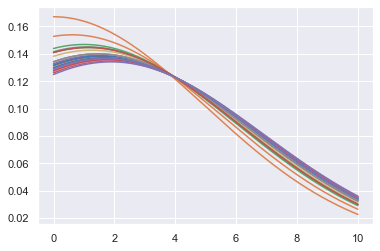

In [31]:
support = np.linspace(0,10, 1000)

for i in range(community_size):
    plt.plot(support, base_forecasts[i].pdf(support))
plt.show()

In [32]:
def second_stage_resolution(model, agents, actual_generations):
    second_stage_decisions = []
    actual_costs = []
    for agent in agents:
        second_stage_decision = (agent.demand 
                                - actual_generations[agent.id] 
                                - model.getVarByName(f'Agent {agent.id} day-ahead purchase').X
                                + model.getVarByName(f'Agent {agent.id} day-ahead sale').X
                                - model.getVarByName(f'Agent {agent.id} net trading').X)

        second_stage_cost = price_rt_buy * second_stage_decision if second_stage_decision > 0 else price_rt_sell * second_stage_decision

        second_stage_decisions.append(second_stage_decision)

        actual_cost = (price_da_buy * model.getVarByName(f'Agent {agent.id} day-ahead purchase').X 
                    - price_da_sell * model.getVarByName(f'Agent {agent.id} day-ahead sale').X
                    + second_stage_cost)


        actual_costs.append(actual_cost)

    return second_stage_decisions, actual_costs

In [33]:
def corrected_trading_costs(agents, model, price_da_buy):
    res = []
    for agent in agents:
        agent_trading_cost = 0
        for agent_2 in agents:
            if agent.connections[agent_2.id]:
                agent_trading_cost += price_da_buy * model.getVarByName(f'q_{agent.id}_{agent_2.id}').X

        res.append(agent_trading_cost)

    return res

In [34]:
def overall_costs(agents, model, price_da_buy, actual_generations):
    return np.array(second_stage_resolution(model, agents, actual_generations)[1]) + np.array(corrected_trading_costs(agents, model, price_da_buy))

In [35]:
def extract_decision_variables(agents, solved_model):
    decision_vars = {}

    for agent in agents:
        agent_vars = {}
        agent_vars[f'Agent {agent.id} da_purchase'] = solved_model.getVarByName(f'Agent {agent.id} day-ahead purchase').X
        agent_vars[f'Agent {agent.id} da_sale'] = solved_model.getVarByName(f'Agent {agent.id} day-ahead sale').X

        rt_purchase = []
        rt_sale = []
        for proba, proba_val in enumerate(agent.probabilities):
            if proba_val > 0:
                rt_purchase.append(solved_model.getVarByName(f'Agent {agent.id} proba {proba} real-time purchase').X)
                rt_sale.append(solved_model.getVarByName(f'Agent {agent.id} proba {proba} real-time sale').X)

        agent_vars[f'Agent {agent.id} rt_purchase'] = rt_purchase
        agent_vars[f'Agent {agent.id} rt_sale'] = rt_sale

        decision_vars[agent.id] = agent_vars

    return decision_vars

In [36]:
def extract_trades(agents, solved_model):
    decision_vars = {}

    for agent in agents:
        for agent_2 in agents:
            if agent.connections[agent_2.id]:
                agent_vars = {}
                agent_vars[f'q_{agent.id}_{agent_2.id}'] = solved_model.getVarByName(f'q_{agent.id}_{agent_2.id}').X

        decision_vars[agent.id] = agent_vars

    return decision_vars

In [37]:
buys_forecast = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
diff = []
diff_sum = []
sellers_payoffs = []
scores = []
res_1 = []
res_2 = []
decisions = []
trades = []

agent_0_trades = [[], [], [], []]
agent_0_trades_2 = [[], [], [], []]

actual_generations_track = []

for i in range(10):
    sellers = [Seller(distributions[key]['probas_solar'], distributions[key]['values_solar'], wager = 1) for key in agent_keys]
    buyer = Buyer(agents_forecasts[0][0],agents_forecasts[0][1], utility = 1)    

    actual_generations = [sellers[id].forecast_rv().rvs() for id in range(len(sellers))]
    actual_generations_track.append(actual_generations)

    task = actual_generations[0]

    market_1 = Market(sellers, buyer, task = task)
    market_1.make_scaling()
    sellers_payoffs.append(market_1.calculate_payoffs(verbosity=0)[1])
    scores.append(market_1.score_dict)

    qa_forecast_scaled = market_1.scaled_aggregation(type = 'QA', plot = False)
    qa_forecast = market_1.aggregation(type= 'QA', plot = False)

    agents = []
    for id in range(community_size):
        agent = Agents(id = id,
                    probabilities = agents_forecasts[id][0],
                    generation_values = agents_forecasts[id][1],
                    demand = demand[id],
                    connections = connection_matrix[id],
                    kappa = Kappa[id],
                    trading_cost=trading_costs)

        agents.append(agent)

    model_1 = gp.Model()

    market_2 = FirstStageMarket(agents= agents,
                            model = model_1,
                            price_da_buy = price_da_buy,
                            price_da_sell = price_da_sell,
                            price_rt_buy = price_rt_buy,
                            price_rt_sell = price_rt_sell)

    market_2.build_model()
    model_1.setParam('OutputFlag', 0)
    model_1.optimize()

    decision_vars = extract_decision_variables(agents, model_1)
    trades_vars = extract_trades(agents, model_1)
    decisions.append(decision_vars)
    trades.append(trades_vars)

    agent_0_trades[0].append(model_1.getVarByName(f'Agent {0} day-ahead purchase').X)
    agent_0_trades[1].append(model_1.getVarByName(f'Agent {0} day-ahead sale').X)
    agent_0_trades[2].append(model_1.getVarByName(f'Agent {0} net trading').X)


    res_1.append(overall_costs(agents, model_1, price_da_buy, actual_generations))

    agents = []
    for id in range(community_size):
        agent = Agents(id = id,
                    probabilities = agents_forecasts[id][0],
                    generation_values = agents_forecasts[id][1],
                    demand = demand[id],
                    connections = connection_matrix[id],
                    kappa = Kappa[id],
                    trading_cost=trading_costs)

        agents.append(agent)

    for id in range(community_size):
        if buys_forecast[id]:
            probas, values = np.histogram(qa_forecast.rvs(size = 100000), bins = 100, density = True)
            probas = probas / probas.sum()
            agents[id].probabilities = probas
            agents[id].generation_values = values

    model_2 = gp.Model()

    market_3 = FirstStageMarket(agents= agents,
                                model = model_2,
                                price_da_buy = price_da_buy,
                                price_da_sell = price_da_sell,
                                price_rt_buy = price_rt_buy,
                                price_rt_sell = price_rt_sell)

    market_3.build_model()
    model_2.setParam('OutputFlag', 0)
    model_2.optimize()

    agent_0_trades_2[0].append(model_2.getVarByName(f'Agent {0} day-ahead purchase').X)
    agent_0_trades_2[2].append(model_2.getVarByName(f'Agent {0} net trading').X)
    agent_0_trades_2[1].append(model_2.getVarByName(f'Agent {0} day-ahead sale').X)

    res_2.append(overall_costs(agents, model_2, price_da_buy, actual_generations))

    diff_temp = overall_costs(agents, model_2, price_da_buy, actual_generations) - overall_costs(agents, model_1, price_da_buy, actual_generations)
    diff.append(diff_temp)
    diff_sum.append(diff_temp.sum())

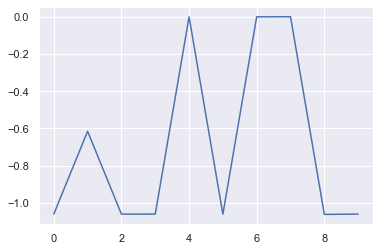

In [38]:
plt.plot(diff_sum)

In [39]:
trades

[{0: {'q_0_1': -10.0},
  1: {'q_1_2': -10.0},
  2: {'q_2_24': -10.0},
  3: {'q_3_24': 10.0},
  4: {'q_4_21': -10.0},
  5: {'q_5_22': 3.600100802978435},
  6: {'q_6_22': -10.0},
  7: {'q_7_14': -10.0},
  8: {'q_8_14': 10.0},
  9: {'q_9_16': 10.0},
  10: {'q_10_16': -4.400019532034059},
  11: {'q_11_17': 10.0},
  12: {'q_12_17': 10.0},
  13: {'q_13_19': 6.9000344308245865},
  14: {'q_14_15': -10.0},
  15: {'q_15_24': 10.0},
  16: {'q_16_24': 10.0},
  17: {'q_17_19': -10.0},
  18: {'q_18_19': 10.0},
  19: {'q_19_24': 10.0},
  20: {'q_20_2': -6.300025796789374},
  21: {'q_21_4': 10.0},
  22: {'q_22_23': 10.0},
  23: {'q_23_22': -10.0},
  24: {'q_24_19': -10.0}},
 {0: {'q_0_1': -10.0},
  1: {'q_1_2': -10.0},
  2: {'q_2_24': -10.0},
  3: {'q_3_24': 10.0},
  4: {'q_4_21': -10.0},
  5: {'q_5_22': 3.600100802978435},
  6: {'q_6_22': -10.0},
  7: {'q_7_14': -10.0},
  8: {'q_8_14': 10.0},
  9: {'q_9_16': 10.0},
  10: {'q_10_16': -4.400019532034059},
  11: {'q_11_17': 10.0},
  12: {'q_12_17': 10.0

In [40]:
decisions

[{0: {'Agent 0 da_purchase': 14.300220048820744,
   'Agent 0 da_sale': 0.0,
   'Agent 0 rt_purchase': [3.69975419407821,
    3.599760837481501,
    3.4997674808847954,
    3.3997741242880863,
    3.2997807676913773,
    3.1997874110946682,
    3.099794054497959,
    2.9998006979012537,
    2.899807341304541,
    2.7998139847078356,
    2.6998206281111266,
    2.5998272715144175,
    2.4998339149177085,
    2.3998405583209994,
    2.299847201724294,
    2.199853845127585,
    2.099860488530876,
    1.9998671319341668,
    1.8998737753374577,
    1.7998804187407522,
    1.6998870621440432,
    1.5998937055473341,
    1.499900348950625,
    1.399906992353916,
    1.2999136357572088,
    1.1999202791605015,
    1.0999269225637924,
    0.9999335659670834,
    0.8999402093703743,
    0.7999468527736671,
    0.699953496176958,
    0.5999601395802507,
    0.4999667829835417,
    0.39997342638683264,
    0.2999800697901236,
    0.19998671319341632,
    0.09999335659670905,
    0.0,
    0.0,
   

In [41]:
def sliding_mean(array, window):
    res = []
    for i in range(len(array) - window):
        res.append(np.array(array[i : i + window]).mean())

    return np.array(res)

In [42]:
def sliding_max(array, window):
    res = []
    for i in range(len(array) - window):
        res.append(np.array(array[i : i + window]).max())

    return np.array(res)

In [43]:
def sliding_min(array, window):
    res = []
    for i in range(len(array) - window):
        res.append(np.array(array[i : i + window]).min())

    return np.array(res)

In [44]:
def trend(array, window):
    res = []
    for i in range(0, len(array) // window):
        res.append([array[i * window : (i+1) * window].mean()] * 10)

    return np.array(res)

In [45]:
df_1 = pd.DataFrame(np.array(res_2)[:, 0])

In [46]:
df_1['a'] = df_1[0].rolling(200, min_periods=1).mean()
df_1['b'] = df_1[0].rolling(200, min_periods=1).quantile(0.75)
df_1['c'] = df_1[0].rolling(200, min_periods=1).quantile(0.25)

In [47]:
df_1

,0,a,b,c
0,2.586870,2.586870,2.586870,2.586870
1,1.999553,2.293212,2.440041,2.146383
2,2.539617,2.375347,2.563244,2.269585
3,2.593320,2.429840,2.588483,2.404601
4,1.807628,2.305398,2.586870,1.999553
5,2.595727,2.353786,2.591708,2.134569
6,2.484628,2.372478,2.590095,2.242091
7,2.480942,2.386036,2.588483,2.360595
8,2.591008,2.408810,2.591008,2.480942
9,2.589013,2.426831,2.590509,2.481863


In [48]:
df_2 = pd.DataFrame(np.array(res_1)[:, 0])

df_2['a'] = df_2[0].rolling(200, min_periods=1).mean()
df_2['b'] = df_2[0].rolling(200, min_periods=1).quantile(0.75)
df_2['c'] = df_2[0].rolling(200, min_periods=1).quantile(0.25)

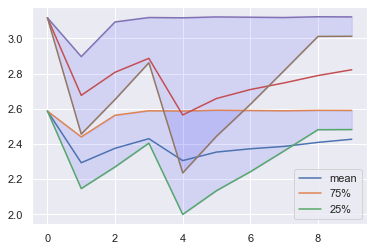

In [49]:

x = df_1.index

plt.plot(x, df_1[['a', 'b', 'c']], label = ['mean', '75%', '25%'])
plt.plot(df_2[['a', 'b', 'c']])


plt.fill_between(x, df_1['b'], df_1['c'], alpha = 0.1, color = 'blue')
plt.fill_between(x, df_2['b'], df_2['c'], alpha = 0.1, color = 'blue')

plt.legend()

In [50]:
df_1[0].mean() - df_2[0].mean()

-0.39487162681152643

In [51]:
df_1.to_csv('df_1.csv')

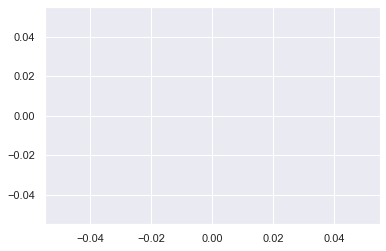

In [52]:
window = 20

plt.plot(sliding_mean(np.array(res_2)[:, 0], window))
#plt.plot(sliding_max(np.array(res_2)[:, 0], window))
#plt.plot(sliding_min(np.array(res_2)[:, 0], window))

plt.plot(sliding_mean(np.array(res_1)[:, 0], window))
#plt.plot(sliding_max(np.array(res_1)[:, 0], window))
#plt.plot(sliding_min(np.array(res_1)[:, 0], window))

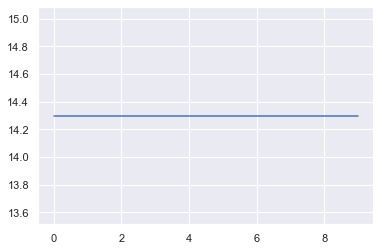

In [53]:
plt.plot(agent_0_trades[0])

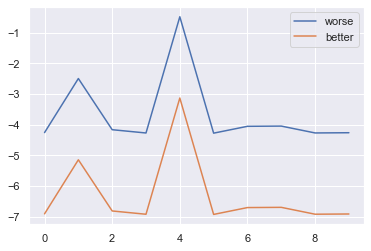

In [54]:
plt.plot(np.array(actual_generations_track)[::, 0] - (agent_0_trades[0][0] + agent_0_trades[2][0]), label = 'worse')
plt.plot(np.array(actual_generations_track)[::, 0] - (agent_0_trades_2[0][0] + agent_0_trades_2[2][0]), label = 'better')
plt.legend()

In [55]:
(np.array(actual_generations_track)[::, 0] - (agent_0_trades[0][0] + agent_0_trades[2][0])).mean()

-3.653800812451519

In [56]:
(np.array(actual_generations_track)[::, 0] - (agent_0_trades_2[0][0] + agent_0_trades_2[2][0])).mean()

-6.303630546648003

In [57]:
agents[0].demand - (agent_0_trades[0][0] + agent_0_trades[2][0])

3.6997799511792557

In [58]:
agents[0].demand - (agent_0_trades_2[0][0] + agent_0_trades_2[2][0])

1.0499502169827721

In [59]:
np.array(actual_generations_track)[::, 0].mean()

0.6464192363692249

In [60]:
agents[0].demand

8

In [61]:
agent_0_trades[0][0] 

14.300220048820744

In [62]:
agent_0_trades_2[0][0] 

16.950049783017228

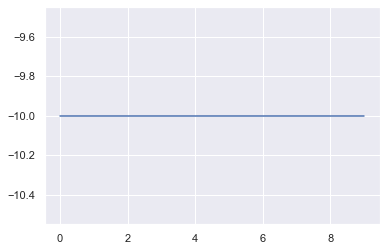

In [63]:
plt.plot(agent_0_trades_2[2])

In [64]:
agent_0_trades[2][0]

-10.0

In [65]:
p_1 = (price_da_buy - price_rt_sell) / (price_rt_buy - price_rt_sell)
p_2 = (price_da_sell - price_rt_sell) / (price_rt_buy - price_rt_sell)

In [66]:
agents[0].demand - base_forecasts[0].ppf(p_1)

4.243330908929456

In [67]:
agents[0].demand - qa_forecast.ppf(p_1)

6.915181370245156

In [68]:
agents[0].demand - qa_forecast.ppf(p_2)

7.670455551779479

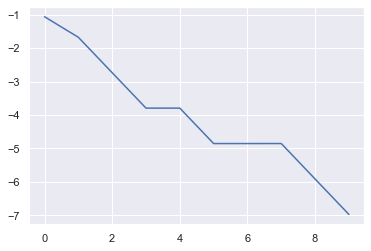

In [69]:
plt.plot(np.array(diff_sum).cumsum())

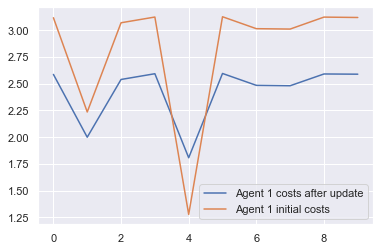

In [70]:
plt.plot(np.array(res_2)[:, 0], label = 'Agent 1 costs after update')
plt.plot(np.array(res_1)[:, 0], label = 'Agent 1 initial costs ')

#plt.plot(np.array(diff)[:, 0], label = 'Difference')
plt.legend()

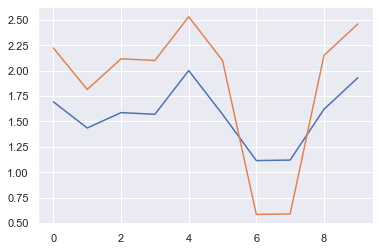

In [71]:
plt.plot(np.array(res_2)[:, -1])
plt.plot(np.array(res_1)[:, -1])
#plt.plot(np.array(diff)[:, -1])

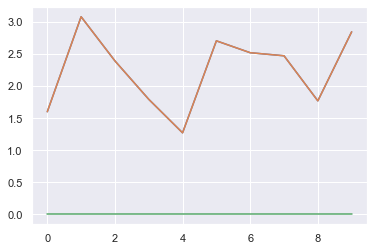

In [72]:
plt.plot(np.array(res_2)[:, 1])
plt.plot(np.array(res_1)[:, 1])
plt.plot(np.array(diff)[:, 1])

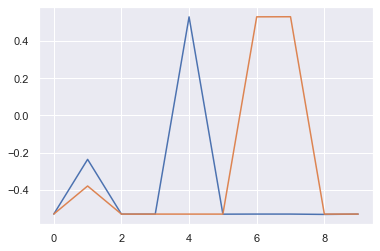

In [73]:
plt.plot(np.array(diff)[:, 0])
plt.plot(np.array(diff)[:, -1])

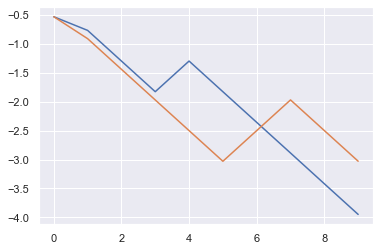

In [74]:
plt.plot(np.array(diff)[:, 0].cumsum())
plt.plot(np.array(diff)[:, -1].cumsum())

In [75]:
x = np.linspace(-5,15,1000)
cdf = stats.norm.cdf

real =  stats.norm(3,2) 
better = stats.norm(2, 2)
worse = stats.norm(5,2) 

cdf_real = real.cdf(x)
cdf_better = better.cdf(x)
cdf_worse = worse.cdf(x)

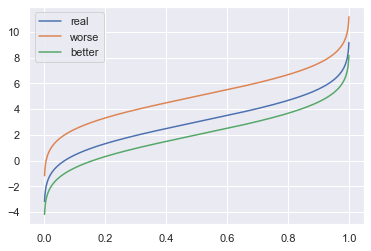

In [76]:
p = np.linspace(0, 1, 1000)

plt.plot(p, real.ppf(p), label = 'real')
plt.plot(p, worse.ppf(p), label = 'worse')
plt.plot(p, better.ppf(p), label = 'better')

plt.legend()
plt.show()

/var/folders/98/gq_0lybs5k55th2hc4jstmyw00m7tv/T/ipykernel_3650/932028501.py:5: RuntimeWarning: invalid value encountered in subtract
  plt.plot(p, abs(ppf_real - ppf_worse), label = 'diff worse')
/var/folders/98/gq_0lybs5k55th2hc4jstmyw00m7tv/T/ipykernel_3650/932028501.py:6: RuntimeWarning: invalid value encountered in subtract
  plt.plot(p, abs(ppf_real - ppf_better),  label = 'diff better')


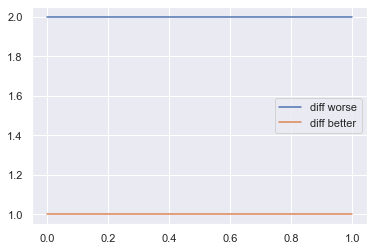

In [77]:
ppf_real = real.ppf(p)
ppf_worse = worse.ppf(p)
ppf_better = better.ppf(p)

plt.plot(p, abs(ppf_real - ppf_worse), label = 'diff worse')
plt.plot(p, abs(ppf_real - ppf_better),  label = 'diff better')

plt.legend()

/var/folders/98/gq_0lybs5k55th2hc4jstmyw00m7tv/T/ipykernel_3650/3195470675.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(p, abs(ppf_real - ppf_worse) - abs(ppf_real - ppf_better))


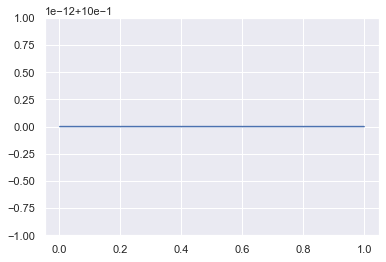

In [78]:
plt.plot(p, abs(ppf_real - ppf_worse) - abs(ppf_real - ppf_better))
plt.show()

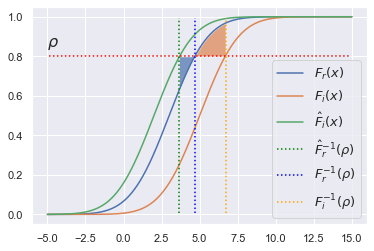

In [79]:
#sns.set_style('white')

plt.plot(x, cdf_real, label = r'$F_r(x)$')
plt.plot(x, cdf_worse, label = r'$F_i(x)$')
plt.plot(x, cdf_better, label = r'$\hat{F}_i(x)$')

plt.axhline(0.8, xmin = 0.05, xmax = 0.95, color = 'red', ls = ':')

plt.axvline(3.65, ymin = 0.05, ymax = 0.95, color = 'green', ls = ':', label = r'$\hat{F}^{-1}_r(\rho)$')
plt.axvline(4.72, ymin = 0.05, ymax = 0.95, color = 'blue', ls = ':', label = r'$F^{-1}_r(\rho)$')
plt.axvline(6.71, ymin = 0.05, ymax = 0.95, color = 'orange', ls = ':', label = r'$F^{-1}_i(\rho)$')

first_interval = np.linspace(3.64, 4.72, 1000)
second_interval = np.linspace(4.72, 6.71, 1000)

plt.fill_between(first_interval, real.cdf(first_interval), 0.8, alpha=0.7)
plt.fill_between(second_interval, real.cdf(second_interval), 0.8, alpha=0.7)

plt.annotate(r'$\rho$', (-5, 0.85), fontsize = 16)

plt.legend(fontsize=13)
plt.show()

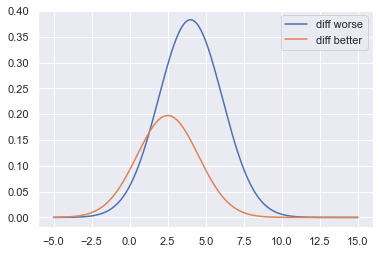

In [80]:
plt.plot(x, abs(cdf_real - cdf_worse), label = 'diff worse')
plt.plot(x, abs(cdf_real - cdf_better),  label = 'diff better')

plt.legend()

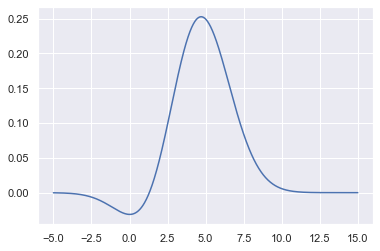

In [81]:
plt.plot(x, abs(cdf_real - cdf_worse) - abs(cdf_real - cdf_better))
plt.show()

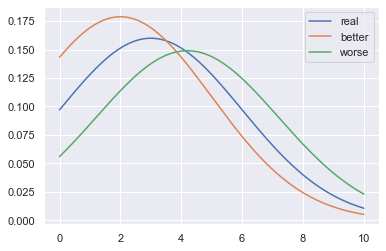

In [82]:
myclip_a = 0
myclip_b = 10
my_scale = 3.0

real_mean = 3
better_mean = 2
worse_mean = 4.2

def scale_parameters(myclip_a, myclip_b, my_mean, my_std):
    a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

    return a,b


real_dist = stats.truncnorm(loc = real_mean, 
                                scale = my_scale, 
                                a = scale_parameters(myclip_a, myclip_b, real_mean, my_scale)[0], 
                                b = scale_parameters(myclip_a, myclip_b, real_mean, my_scale)[1]) 

worse_dist = stats.truncnorm(loc = worse_mean, 
                                scale = my_scale, 
                                a = scale_parameters(myclip_a, myclip_b, worse_mean, my_scale)[0], 
                                b = scale_parameters(myclip_a, myclip_b, worse_mean, my_scale)[1])

better_dist = stats.truncnorm(loc = better_mean, 
                                scale = my_scale, 
                                a = scale_parameters(myclip_a, myclip_b, better_mean, my_scale)[0], 
                                b = scale_parameters(myclip_a, myclip_b, better_mean, my_scale)[1])

support = np.linspace(0,10, 1000)

plt.plot(support, real_dist.pdf(support), label = 'real')
plt.plot(support, better_dist.pdf(support), label = 'better')
plt.plot(support, worse_dist.pdf(support), label = 'worse')
plt.legend()
plt.show()                                

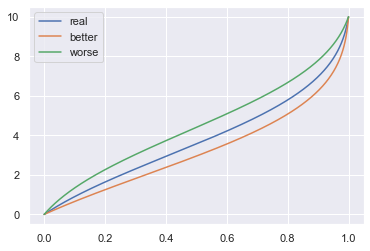

In [83]:
ppf_support = np.linspace(0, 1, 1000)

plt.plot(ppf_support, real_dist.ppf(ppf_support), label = 'real')
plt.plot(ppf_support, better_dist.ppf(ppf_support), label = 'better')
plt.plot(ppf_support, worse_dist.ppf(ppf_support), label = 'worse')

plt.legend()
plt.show()

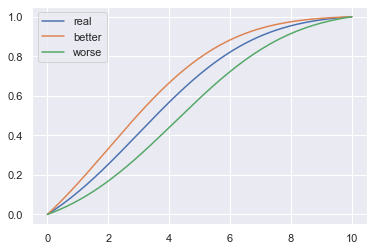

In [84]:
plt.plot(support, real_dist.cdf(support), label = 'real')
plt.plot(support, better_dist.cdf(support), label = 'better')
plt.plot(support, worse_dist.cdf(support), label = 'worse')
plt.legend()
plt.show()

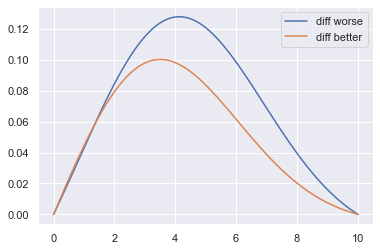

In [85]:
plt.plot(support, abs(real_dist.cdf(support) - worse_dist.cdf(support)), label = 'diff worse')
plt.plot(support, abs(real_dist.cdf(support) - better_dist.cdf(support)),  label = 'diff better')

plt.legend()

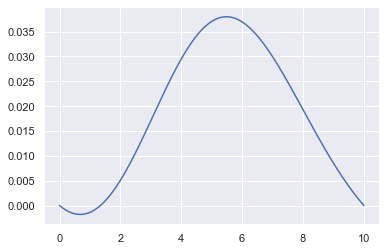

In [86]:
plt.plot(support, abs(real_dist.cdf(support) - worse_dist.cdf(support)) - abs(real_dist.cdf(support) - better_dist.cdf(support)))
plt.show()

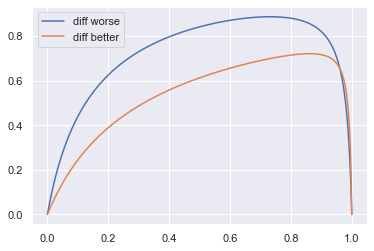

In [87]:
plt.plot(ppf_support, abs(real_dist.ppf(ppf_support) - worse_dist.ppf(ppf_support)), label = 'diff worse')
plt.plot(ppf_support, abs(real_dist.ppf(ppf_support) - better_dist.ppf(ppf_support)),  label = 'diff better')

plt.legend()

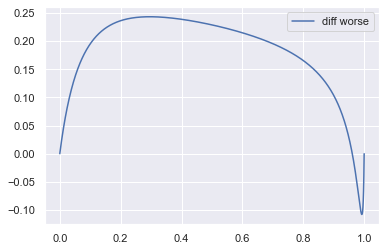

In [88]:
plt.plot(ppf_support, abs(real_dist.ppf(ppf_support) - worse_dist.ppf(ppf_support)) - abs(real_dist.ppf(ppf_support) - better_dist.ppf(ppf_support)), label = 'diff worse')


plt.legend()

In [89]:
standard = stats.norm(0,1)

real =  stats.norm(3,2) 
better = stats.norm(2, 2)
worse = stats.norm(5,2) 

mu_real = 3
mu_better = 2
mu_worse = 5

p = np.linspace(0, 1, 1000)

In [90]:
def evaluation(p, mu_real):
    t = (mu_worse - mu_real) / (mu_worse - mu_better)

    quantile = standard.ppf(p)

    first_func = standard.cdf(0.5 * (mu_worse - mu_real) + quantile)
    second_func = standard.cdf(0.5 * (mu_better - mu_real) + quantile)

    return t * first_func + (1-t) * second_func - p

<function matplotlib.pyplot.show(close=None, block=None)>

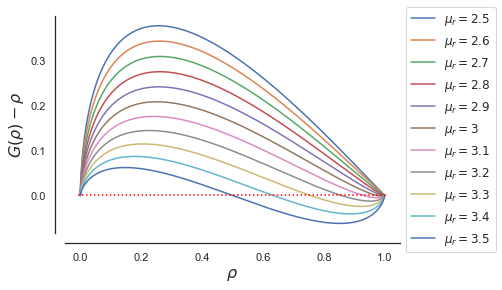

In [91]:
sns.set_style('white')
for mu_real in [2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5]:
    plt.plot(p, evaluation(p, mu_real), label = rf'$\mu_r = {mu_real}$')

plt.axhline(0.0, xmin = 0.04, xmax = 0.96, color = 'red', ls = ':')

plt.legend(fontsize = 12, bbox_to_anchor=(1, 1.07))
plt.xlabel(r'$\rho$', fontsize = 16)
plt.ylabel(r'$G(\rho) - \rho$', fontsize = 16)

sns.despine(offset=10, trim=False)
plt.show

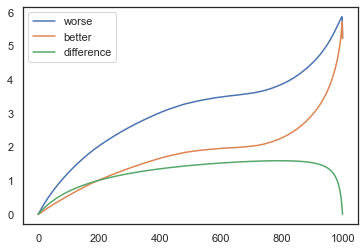

In [92]:
supp = np.linspace(0, 1, 1000)
plt.plot(abs(qa_forecast.ppf(supp) - worse_dist.ppf(supp)), label = 'worse')
plt.plot(abs(qa_forecast.ppf(supp) - better_dist.ppf(supp)), label = 'better')
plt.plot(abs(qa_forecast.ppf(supp) - worse_dist.ppf(supp)) - abs(qa_forecast.ppf(supp) - better_dist.ppf(supp)), label = 'difference')

plt.legend()

In [93]:
for ind, proba in enumerate(probabilities):
    print(model_2.getVarByName(f'Agent {0} proba {proba} real-time purchase').X)

AttributeError: 'NoneType' object has no attribute 'X'

In [ ]:
model_1.getVarByName(f'Agent {1} proba {proba} real-time purchase')